In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from IPython.core.display import display, HTML

In [6]:
#Exploring customer segmentation dataset
df = pd.read_csv(r"C:\Users\mbugu\OneDrive\Desktop\ML DATASET\customer_segmentation_data\customer_segmentation_data.csv")

In [7]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [8]:
df.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [9]:
df.shape

(1000, 9)

In [10]:
#Exploring for NULL values
df.isna().sum()

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

In [11]:
#Dropping id column due to lack of relevance
df.drop("id", axis=1, inplace=True)

In [12]:
cats = ["gender", "preferred_category"]
nums = [i for i in df.columns if i not in cats]

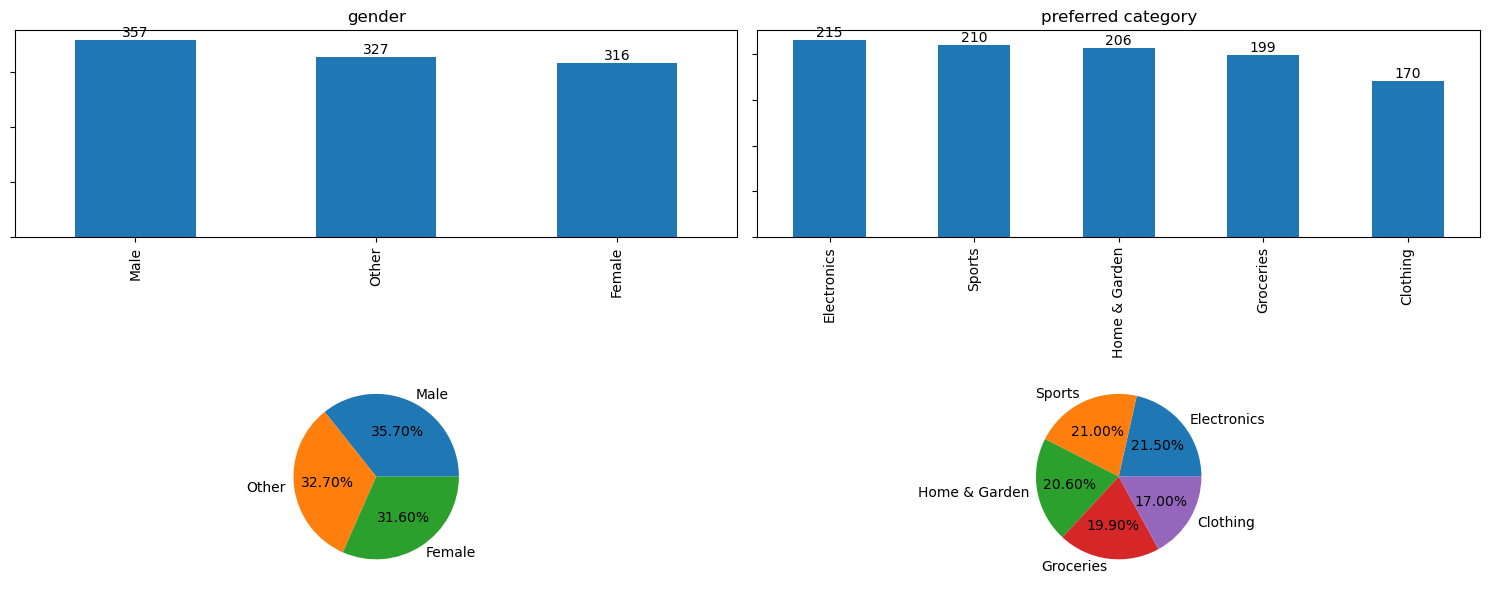

In [13]:
#Categorical features count
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))

for i, j in enumerate(cats):
    index = 0
    count = df[j].value_counts()
    
    count.plot(kind="bar", ax=axes[index][i])
    
    for container in axes[index][i].containers:
        axes[index][i].bar_label(container)
    axes[index][i].set_yticklabels(())
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
    axes[index][i].set_title(j.replace('_', ' '))
    
    index += 1
    
    count.plot(kind="pie", ax=axes[index][i], autopct="%0.2f%%")
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")

plt.tight_layout()
plt.show()

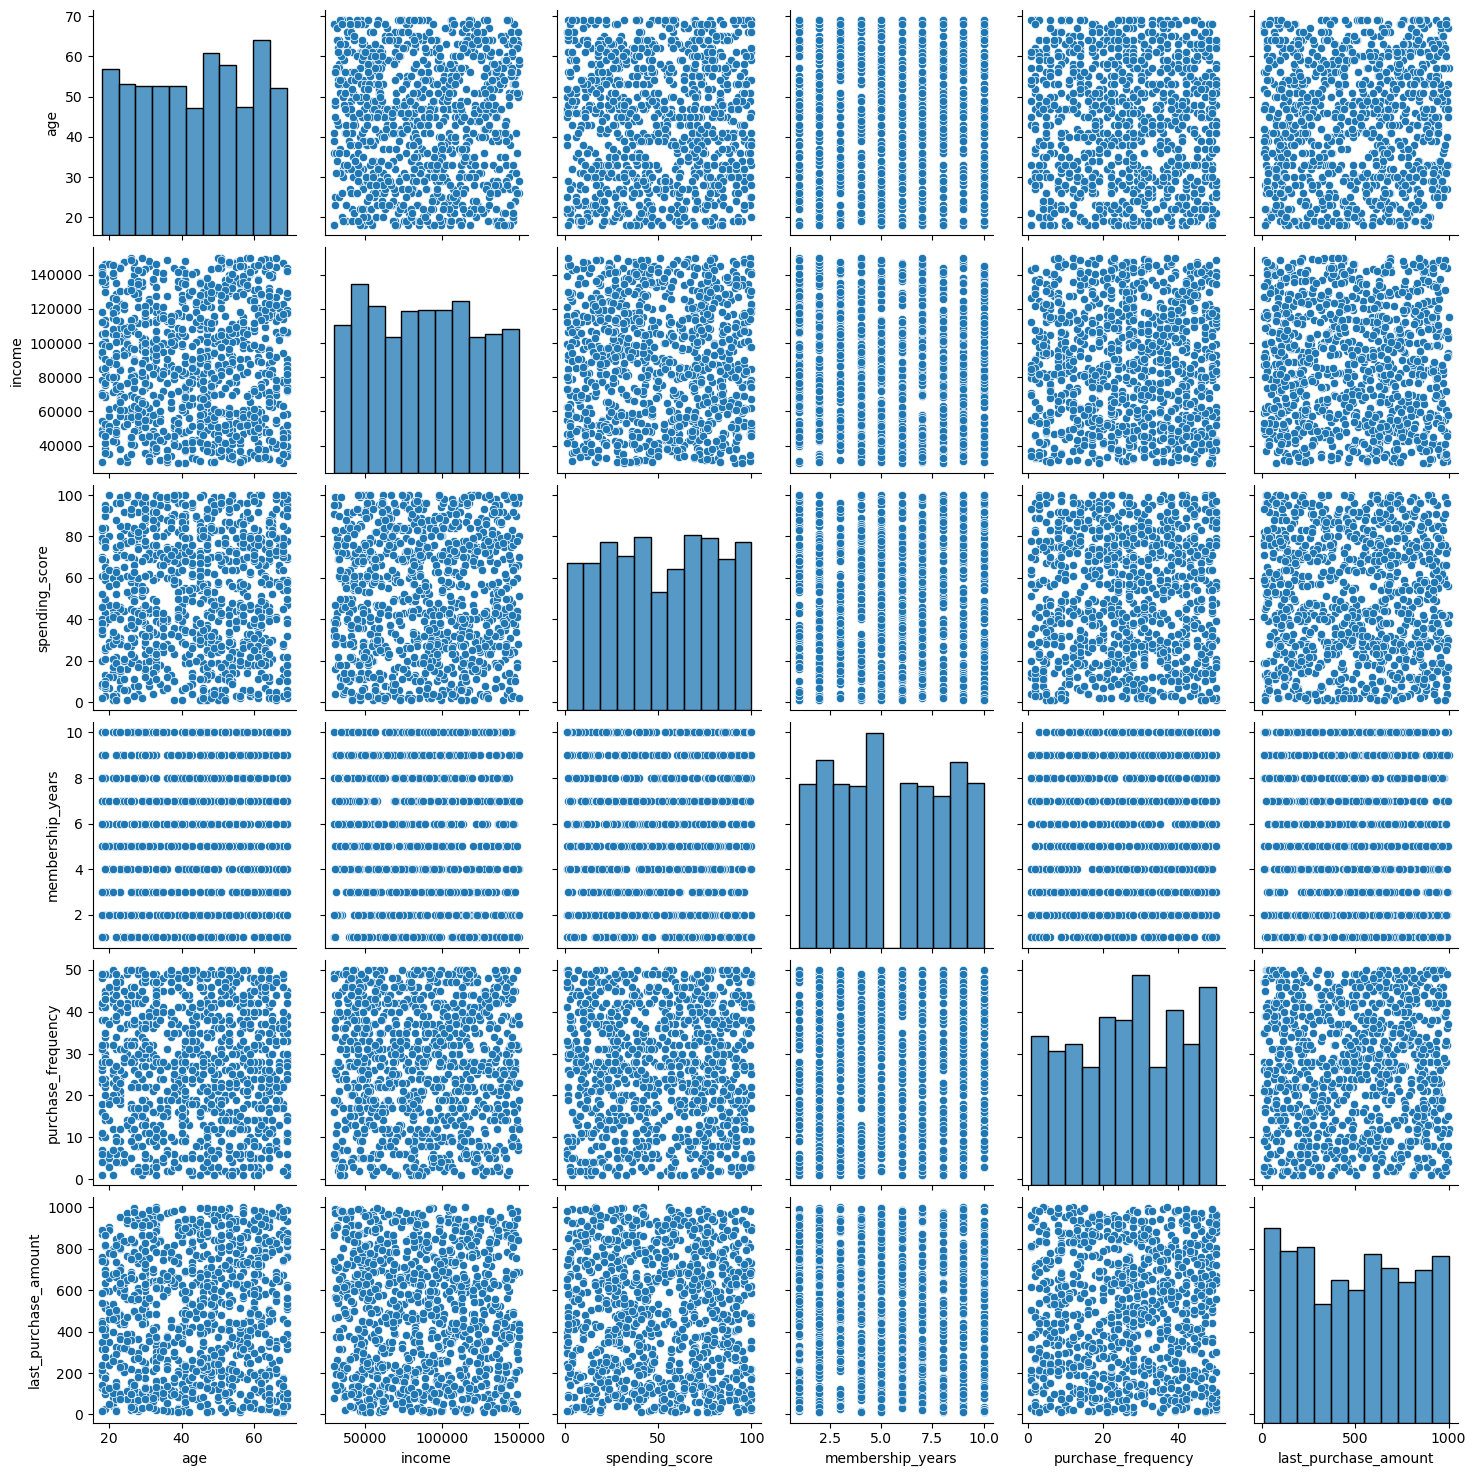

In [14]:
#Data distribution of numerical features
sns.pairplot(df, vars=nums)
plt.show()

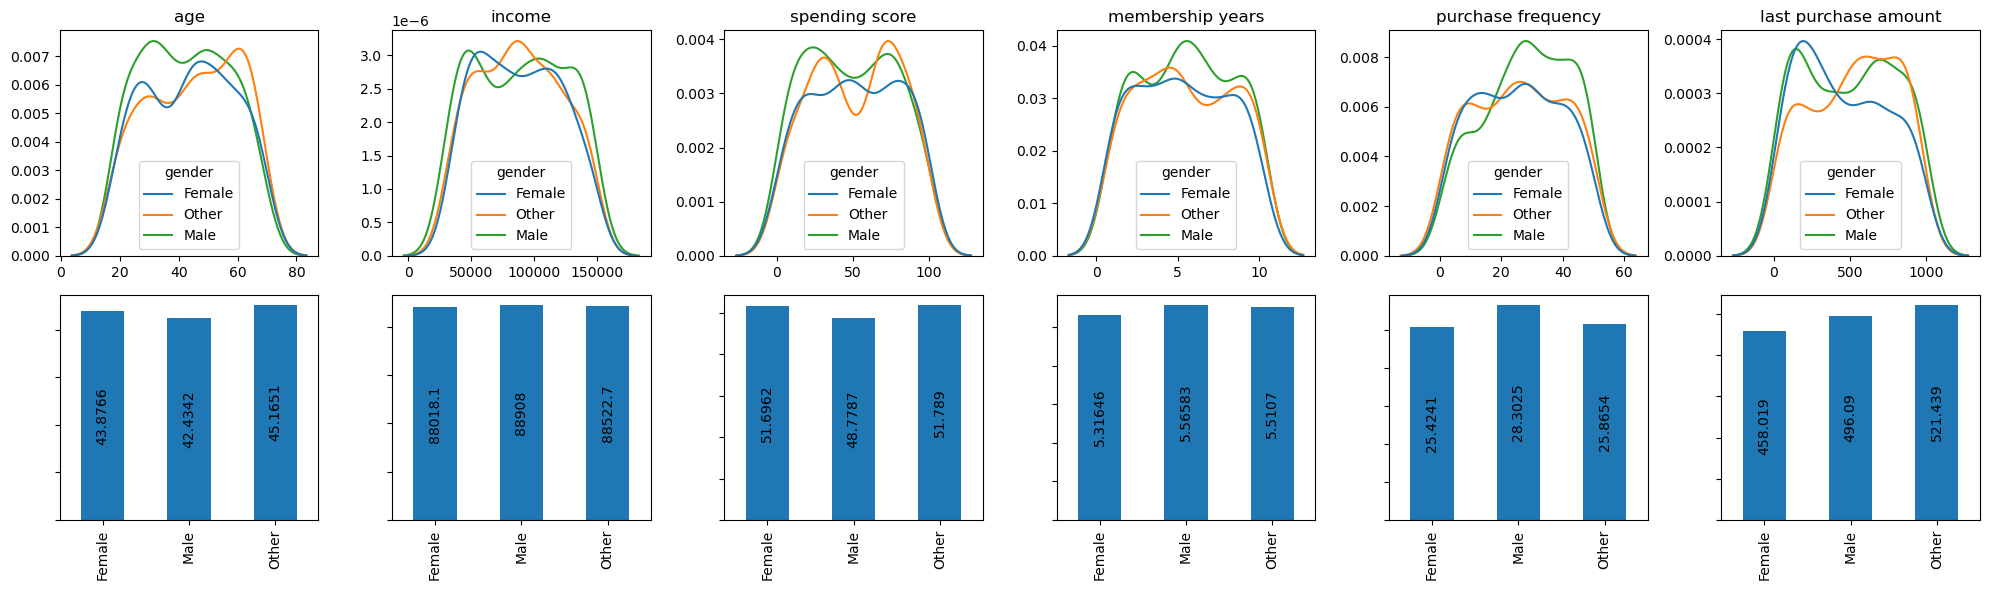

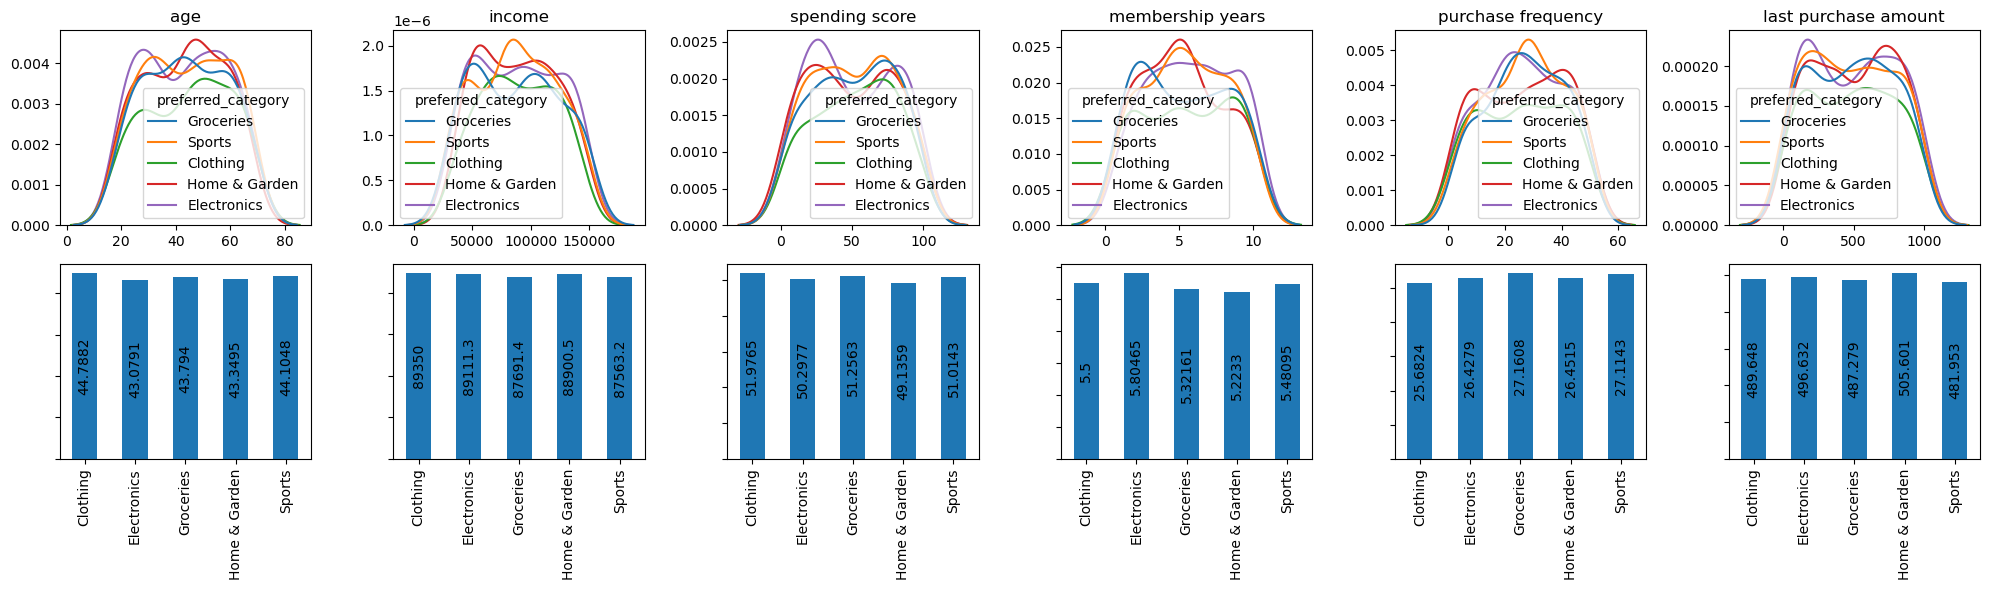

In [16]:
#Data dsitribution among classes - density distribution plots and average values
for i in cats:
    display(HTML("<h2>{}</h2>".format(i.replace('_', ' '))))
    fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(20, 6))
    grouped = df.groupby(i)
    for k, j in enumerate(nums):
        index = 0
        sns.kdeplot(df, x=j, hue=i, ax=axes[index][k])
        axes[index][k].set_ylabel("")
        axes[index][k].set_xlabel("")
        axes[index][k].set_title(j.replace('_', ' '))
        
        index += 1
        
        mean = grouped[j].mean()
        mean.plot(kind="bar", ax=axes[index][k])
        for container in axes[index][k].containers:
            axes[index][k].bar_label(container, label_type="center", rotation=90)
        axes[index][k].set_yticklabels(())
        axes[index][k].set_ylabel("")
        axes[index][k].set_xlabel("")
        
    plt.tight_layout()
    plt.show()

In [17]:
#Encoding categorical features
le = LabelEncoder()

for i in cats:
    df[i] = le.fit_transform(df[i].values)

In [18]:
#Correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
age,1.000000,0.035039,-0.000688,0.017707,-0.003431,-0.030137,-0.006912,0.061599
gender,0.035039,1.000000,0.005821,0.001787,0.027022,0.011515,0.001093,0.085907
income,-0.000688,0.005821,1.000000,0.000020,-0.035783,0.000533,-0.015365,-0.054006
spending_score,0.017707,0.001787,0.000020,1.000000,0.026726,0.006708,-0.013327,-0.014475
membership_years,-0.003431,0.027022,-0.035783,0.026726,1.000000,0.069532,-0.032305,-0.014135
purchase_frequency,-0.030137,0.011515,0.000533,0.006708,0.069532,1.000000,0.026993,0.024400
preferred_category,-0.006912,0.001093,-0.015365,-0.013327,-0.032305,0.026993,1.000000,-0.003985
last_purchase_amount,0.061599,0.085907,-0.054006,-0.014475,-0.014135,0.024400,-0.003985,1.000000


In [19]:
#Scaling all features
x = df.values

scaler = MinMaxScaler()

x = scaler.fit_transform(x)

In [20]:
x_train, x_test = train_test_split(x, random_state=42, test_size=0.2)

In [21]:
#Building clustering models using KMeans and various cluster group numbers and evaluating their performance
clusters = [i for i in range(2, 11)]

for i in clusters:

    kmeans = KMeans(n_clusters=i)

    kmeans.fit(x_train)

    pred = kmeans.predict(x_test)

    score = silhouette_score(x_test, pred)

    print("Sillhouette score for {} clusters: {}".format(i, score))

Sillhouette score for 2 clusters: 0.15328405256464253
Sillhouette score for 3 clusters: 0.1362416706338431
Sillhouette score for 4 clusters: 0.12345260038323151
Sillhouette score for 5 clusters: 0.08589641611522225
Sillhouette score for 6 clusters: 0.08861254455337456
Sillhouette score for 7 clusters: 0.09962204435887628
Sillhouette score for 8 clusters: 0.08963100743989635
Sillhouette score for 9 clusters: 0.09099202854512153
Sillhouette score for 10 clusters: 0.08501678641327232


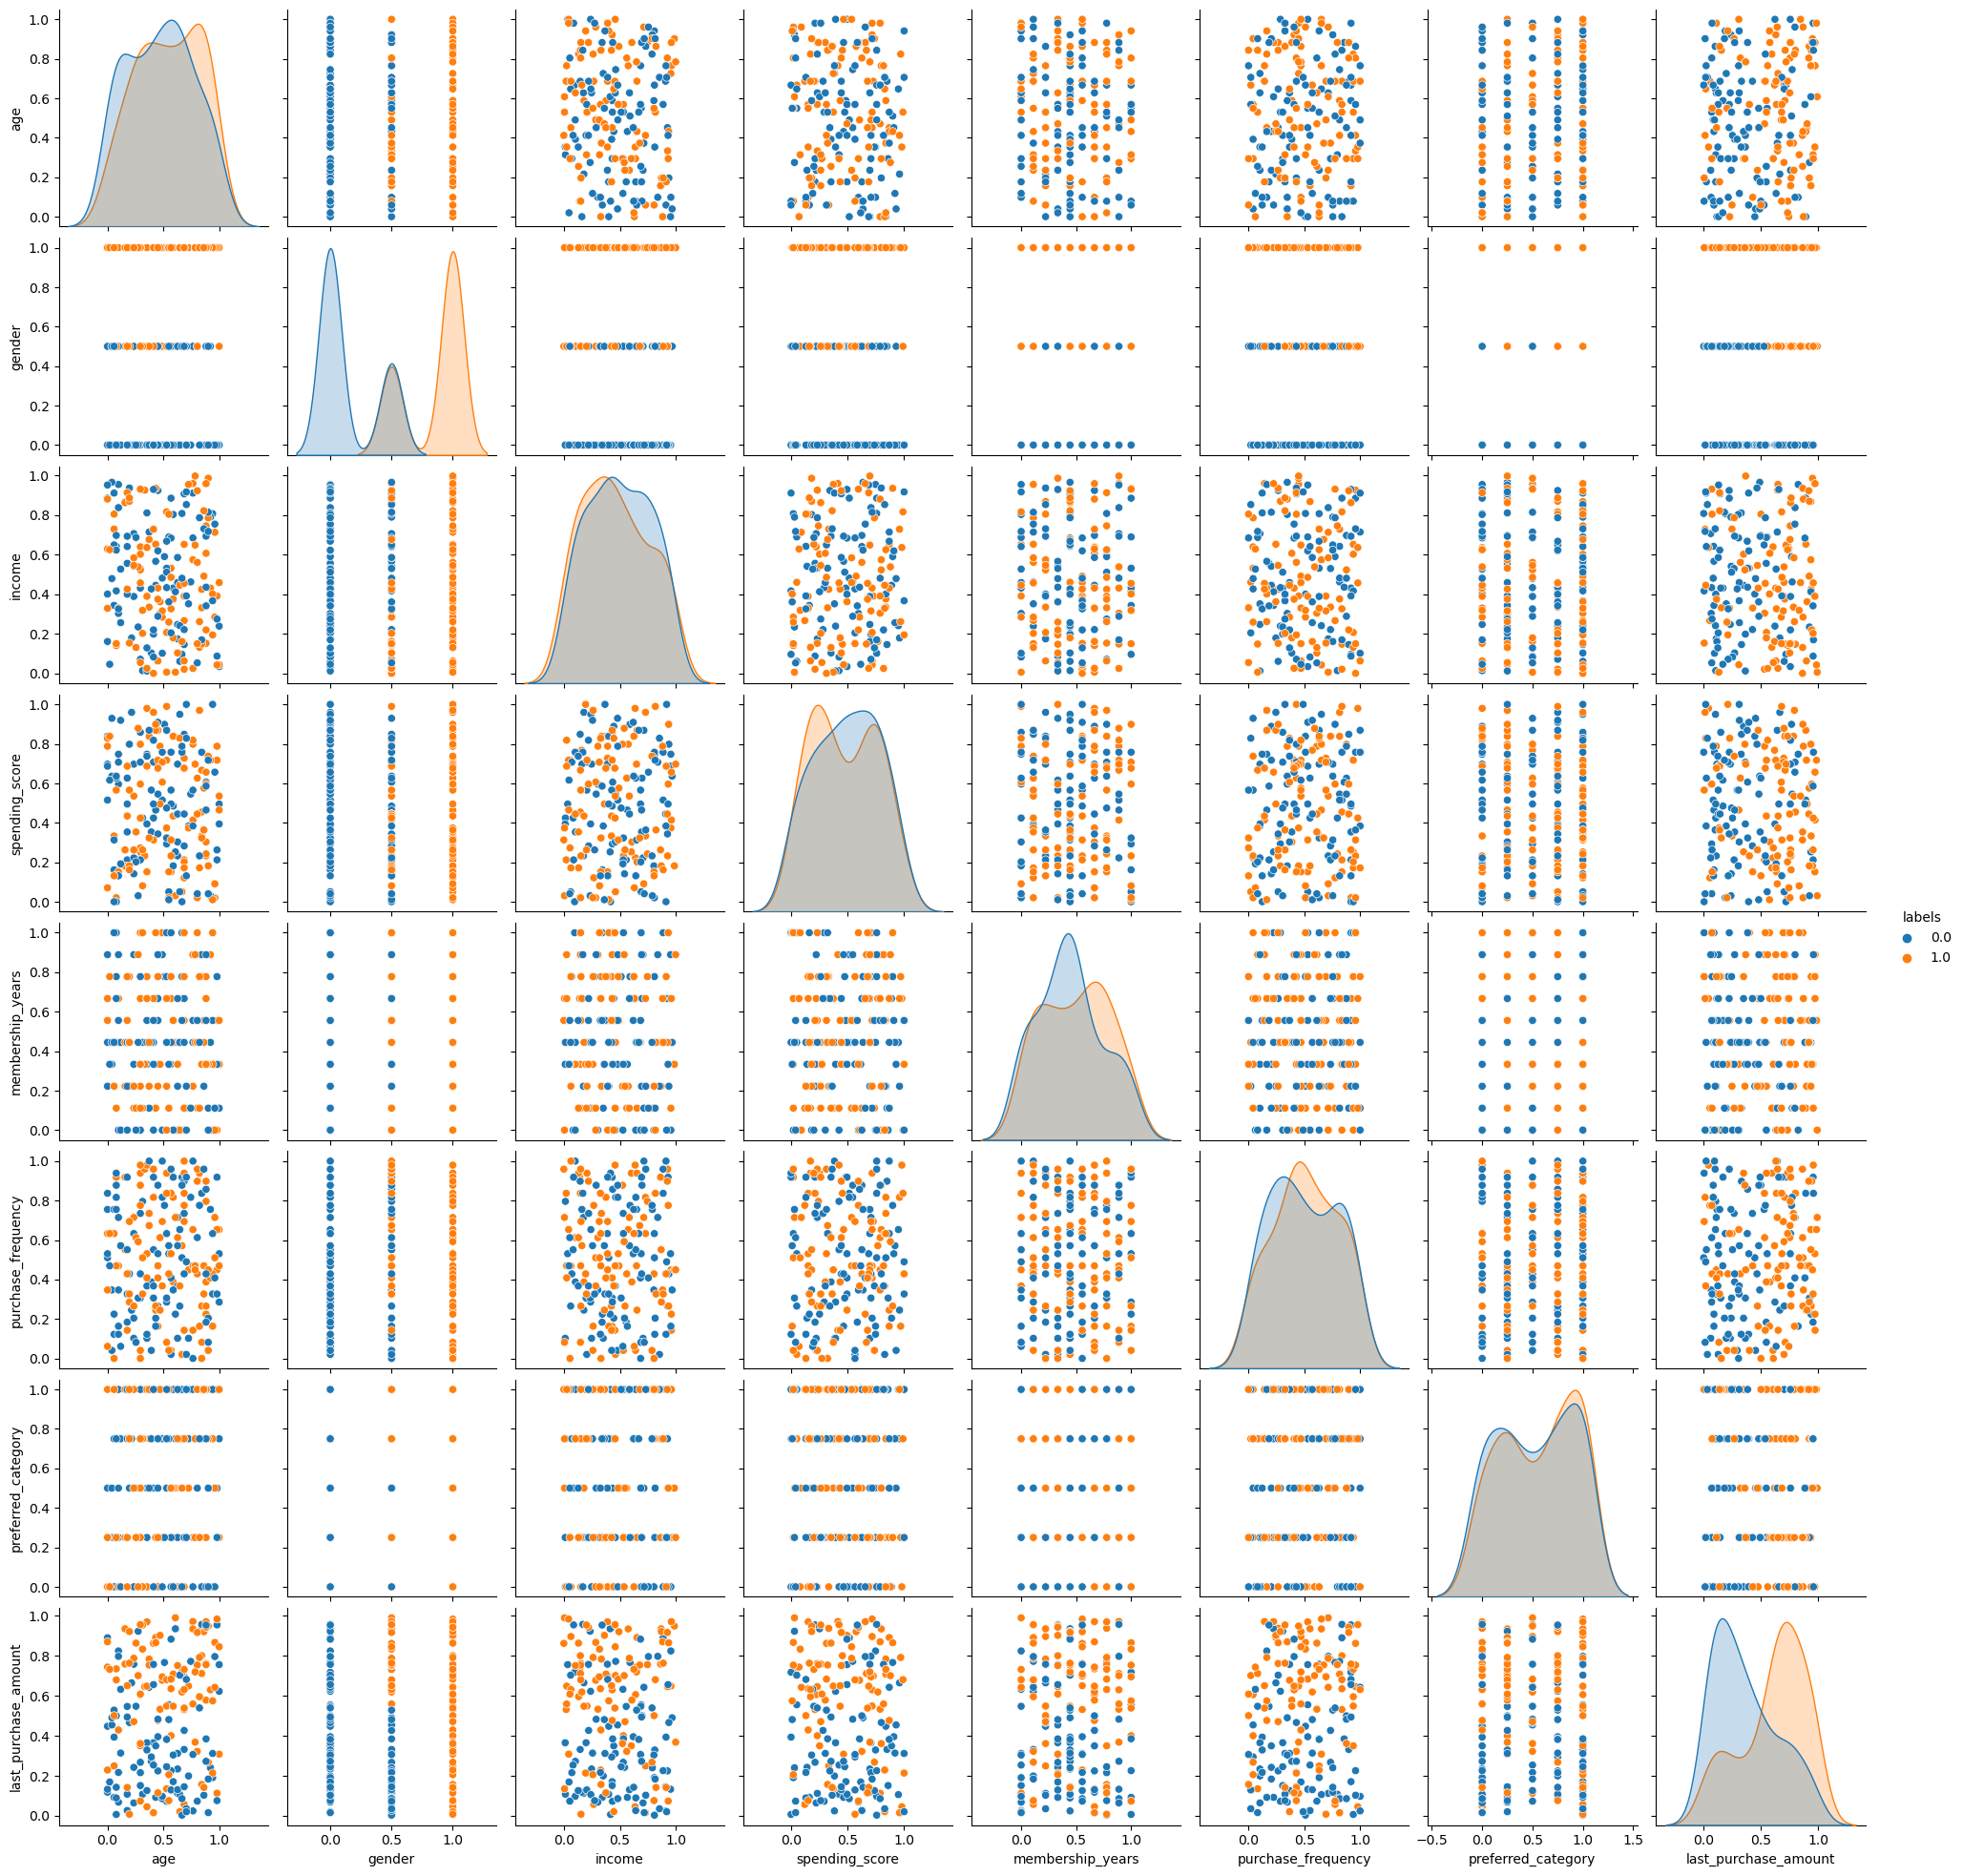

In [22]:
#Visual clusters inspection using KMeans with 2 clusters, since 2 clusters model shows the highest score
kmeans = KMeans(n_clusters=2)

kmeans.fit(x_train)

pred = kmeans.predict(x_test)

data = np.hstack((x_test, pred.reshape(-1, 1)))

dd = pd.DataFrame(data, columns=df.columns.tolist()+["labels"])

sns.pairplot(dd, vars=df.columns, hue="labels")
plt.show()